# Лабораторная работа 1
#### Меркулов Роман Александрович
#### Группа 6


  





## Цель работы
Изучение численных методов решения нелинейных уравнений с использованием Jupyter Notebook





## Ход работы
### 1. Подготовка к проекту
Импортируем необходимые библиотеки и определим испоьзуемые константы

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Для отображения графиков прямо в блокноте
%matplotlib inline

EPS = 0.0001


Определяем функцию, ее производную, а также я сделал возможность вычислять производную численно (с преподавателем по компьютерной графике Косенко делали такую задачу на паре)

In [134]:
def f(x):
    return x**3 - 6*x**2 + 5*x

def analytic_derivative(f: callable, x):
    return 3 * x ** 2 - 12 * x + 5

def numeric_derivative(f: callable, x):
    return ( f(x + EPS) - f(x - EPS) ) / (2 * EPS)


x = np.linspace(-1, 6, 1000)  # 1000 точек для плавности графика
y = f(x)


### 2. Рисуем и анализируем график
Здесь представлен код для построения графика исходной функции

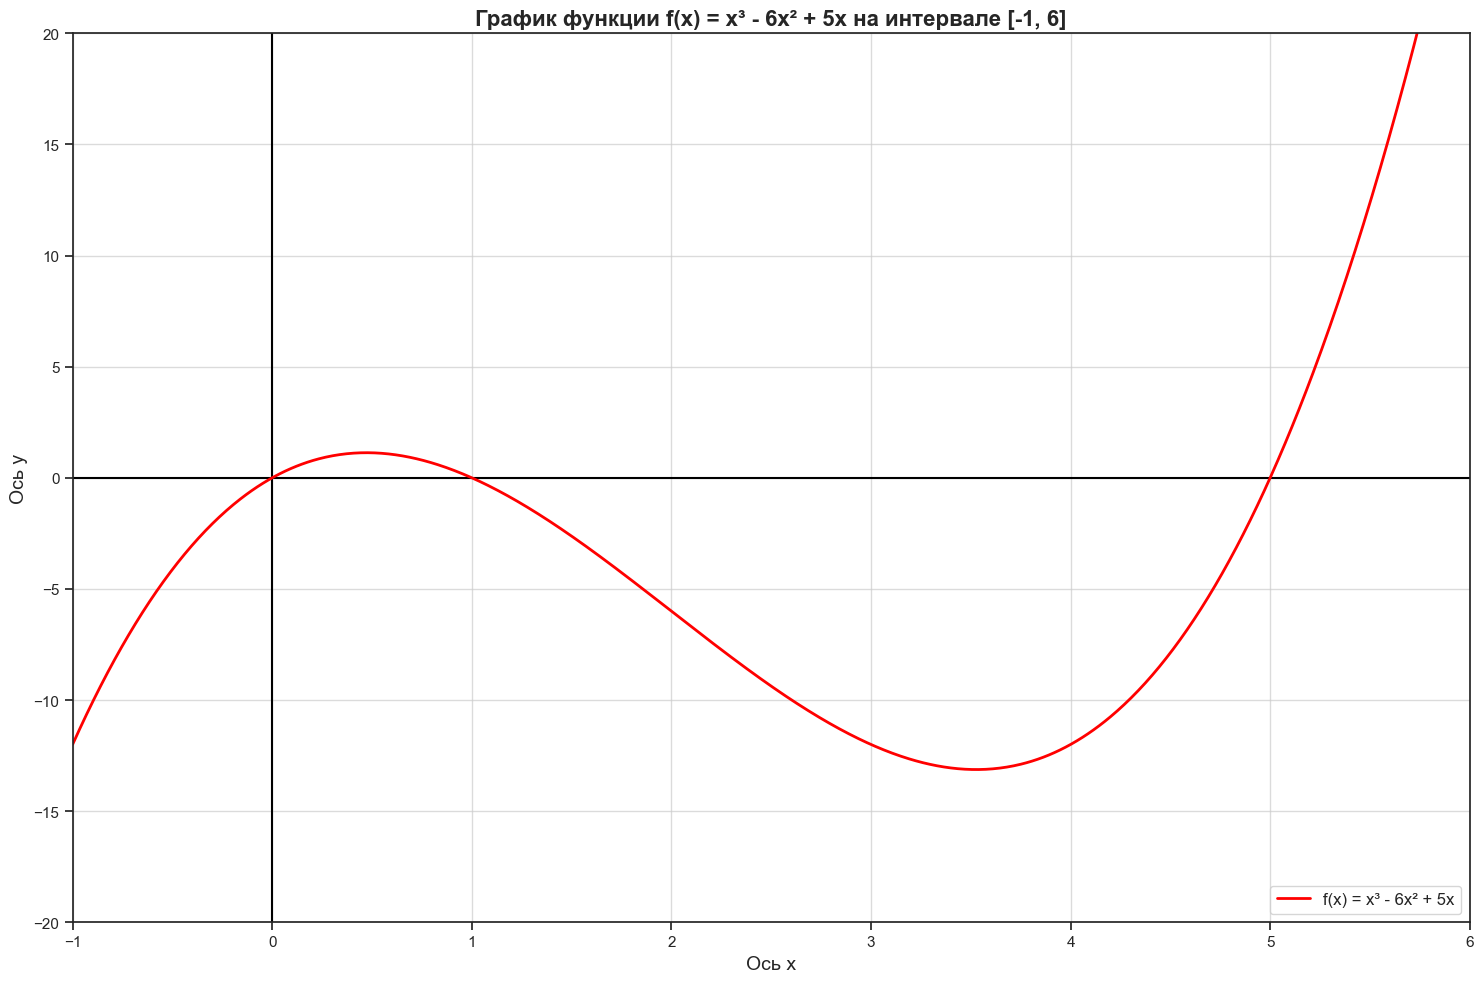

In [135]:
plt.figure(figsize=(15, 10))

# Добавляем оси координат
plt.axhline(color='black')
plt.axvline(color='black')

plt.plot(x, y, 'red', linewidth=2, label='f(x) = x³ - 6x² + 5x')

# Настройки графика
plt.title('График функции f(x) = x³ - 6x² + 5x на интервале [-1, 6]', fontsize=16, fontweight='bold')
plt.xlabel('Ось x', fontsize=14)
plt.ylabel('Ось y', fontsize=14)
plt.grid(True, alpha=0.7)
plt.legend(fontsize=12)
plt.xlim(-1, 6)
plt.ylim(-20, 20)

plt.tight_layout()
plt.show()

### Анализ графика

Построенный график показывает:

1. **Корни функции**: x = 0, x = 1, x = 5
2. **Интервалы знакопостоянства**:
   - f(x) < 0 при x ∈ (-1, 0) ∪ (1, 5)
   - f(x) > 0 при x ∈ (0, 1) ∪ (5, 6]
3. **Поведение на концах интервала**:
   - f(-1) = -12
   - f(6) = 30
4. **Локальные экстремумы** (визуально):
   - Локальный максимум около x ≈ 0.5
   - Локальный минимум около x ≈ 4
5. **Интервалы, содержащие корни уравнения**:
    - На интервале (-0.5, 0.5)
    - На интервале (0.5, 1.5)
    - На интервале (4, 6)

Так как мы сразу видим 3 корня, значит **все корни** этого уравнения лежат в интервале [-1, 6] по ОТА

### 3. Реализация численных методов поиска корня уравнения f(x) = 0
В этом блоке написаны 3 реализации поиска корней функции на определенном интервале 

#### 3.1 Метод бисекции

In [136]:
def bisection_method(f: callable, a, b, max_iterations=1000):
    if f(a) * f(b) > 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала")

    iteration = 0
    while np.abs(b - a) > 2 * EPS and iteration < max_iterations:
        c = (a + b) / 2
        
        if f(a) * f(c) < 0:
            b = c
        elif f(b) * f(c) < 0:
            a = c
        elif f(c) == 0:
            return c
        
        iteration += 1
        
    return (a + b) / 2

Параметры:
- f - функция
- a, b - границы интервала
- max_iterations - максимальное число итераций (по дефолту 1000)

#### 3.2 Метод хорд


In [137]:
def chord_method(f: callable, a, b, max_iterations=1000):
    if f(a) * f(b) > 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала")
    
    x_prev = a
    x_curr = a - ( f(a) * (b - a) ) / ( f(b) - f(a) )
    iteration = 0
    
    while (np.abs(x_curr - x_prev) > EPS and np.abs(f(x_curr)) > EPS) and iteration < max_iterations:
        x_prev = x_curr
        
        if f(a) * f(x_curr) < 0:
            b = x_curr
        elif f(b) * f(x_curr) < 0:
            a = x_curr
        
        x_curr = a - ( f(a) * (b - a) ) / ( f(b) - f(a) )
        
        iteration += 1
        
    return x_curr

Параметры:
- f - функция
- a, b - границы интервала
- max_iterations - максимальное число итераций (по дефолту 1000)

#### 3.3 Метод Ньютона (касательных)
Для этого метода нам потребуется посчитать производную нашей функции. Сделать это можно и аналитически, и численно. Я сделал способность выбора вычисления производной,
 то есть я передаю функцию вычисления производной в сам метод Ньютона извне

In [138]:
def newton_method(f: callable, derivative_func: callable, a, b, max_iterations=1000):
    if f(a) * f(b) > 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала")
    
    iteration = 0 
    
    x_prev = (a + b) / 2
    x_cur = x_prev - f(x_prev) / derivative_func(f, x_prev)
    
    iteration += 1
    
    while np.abs(x_cur - x_prev) > EPS and iteration < max_iterations:
        x_prev = x_cur
        x_cur = x_prev - f(x_prev) / derivative_func(f, x_prev)
        
        iteration += 1
        
    return x_cur

Параметры:
- f - функция
- derivative_func - функция вычисления производной
- a, b - границы интервала
- max_iterations - максимальное число итераций (по дефолту 1000)

#### Все три метода работают достаточно быстро — алгоритмическая сложность у каждого примерно O(log n), что вполне приемлемо даже для большого числа итераций.
В каждом из этих методов я опускаю другие условия остановки по точности, оставляю только по кол-ву итераций для анализа этих методов

### 4. Сравнение методов
В этом блоке я отдельно задал словарем наши 3 метода, причем метод Ньютона, так как принимает доп.параметр - функцию взятия производной - поэтому задаю функцию в виде лямбды, куда могу вставить любой метод взятия производной

In [139]:
methods = {
    'Бисекция': (bisection_method, 'blue'),
    'Хорд': (chord_method, 'green'),
    'Ньютон': (lambda f, a, b, n: newton_method(f, numeric_derivative, a, b, n), 'red')
}

Далее я создаю сам график сравнения 3 методов, где для каждого метода я считаю для каждого кол-ва итераций ошибку его вычисления относительно реального корня нашей функции, причем в совокупности для 3 отрезков(так как у нашей функции 3 корня)

In [140]:
def create_comparison_graphic(methods_dict: dict, f: callable, intervals: list, exact_roots: list, max_iterations: int = 20, log_scale: bool = False):
    plt.figure(figsize=(15, 10))
    
    iterations = range(1, max_iterations + 1)
    
    for name, (method, color) in methods_dict.items():
        total_errors = []
        
        for n_iter in iterations:
            total_error = 0
            
            for (a, b), exact_root in zip(intervals, exact_roots):
                root = method(f, a, b, n_iter)
                total_error += abs(root - exact_root)
                
            total_errors.append(total_error)
            
        if log_scale:
            plt.semilogy(iterations, total_errors, color=color, linewidth=2, label=name)
        else:
            plt.plot(iterations, total_errors, color=color, linewidth=2, label=name)
    
    plt.title("Сравнение методов", fontsize=14)
    plt.xlabel('Количество итераций', fontsize=12)
    plt.ylabel('Суммарная ошибка' + (' (log scale)' if log_scale else ''), fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()

В этом блоке мы уже используем нашу функцию построения графика сравнения методов, причем и для обычной шкалы, и для логарифмической

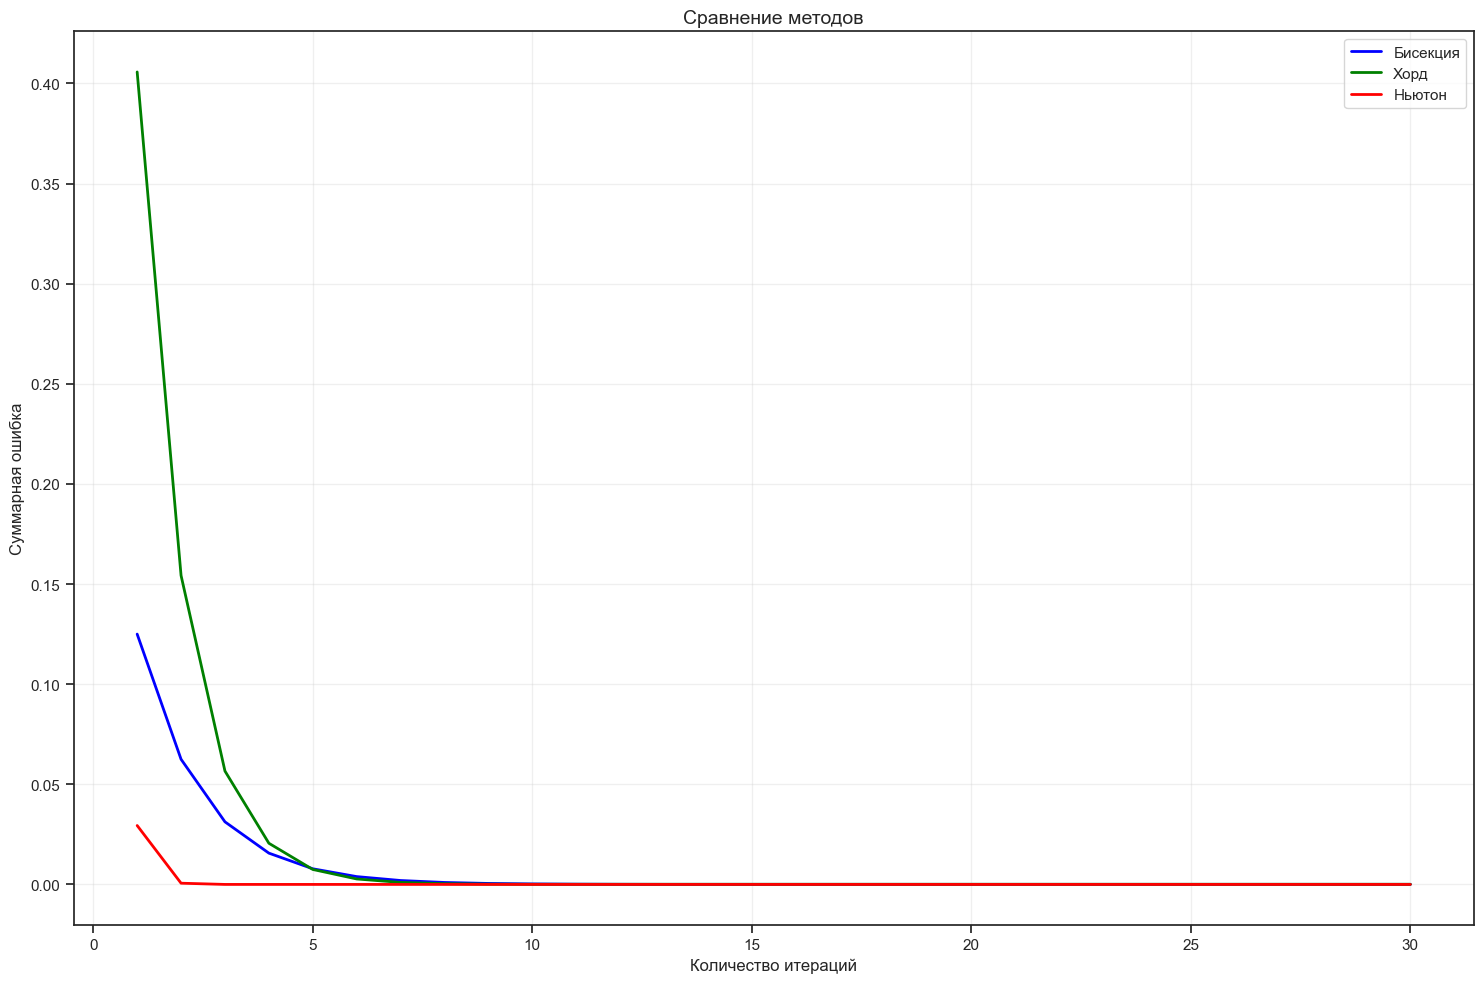

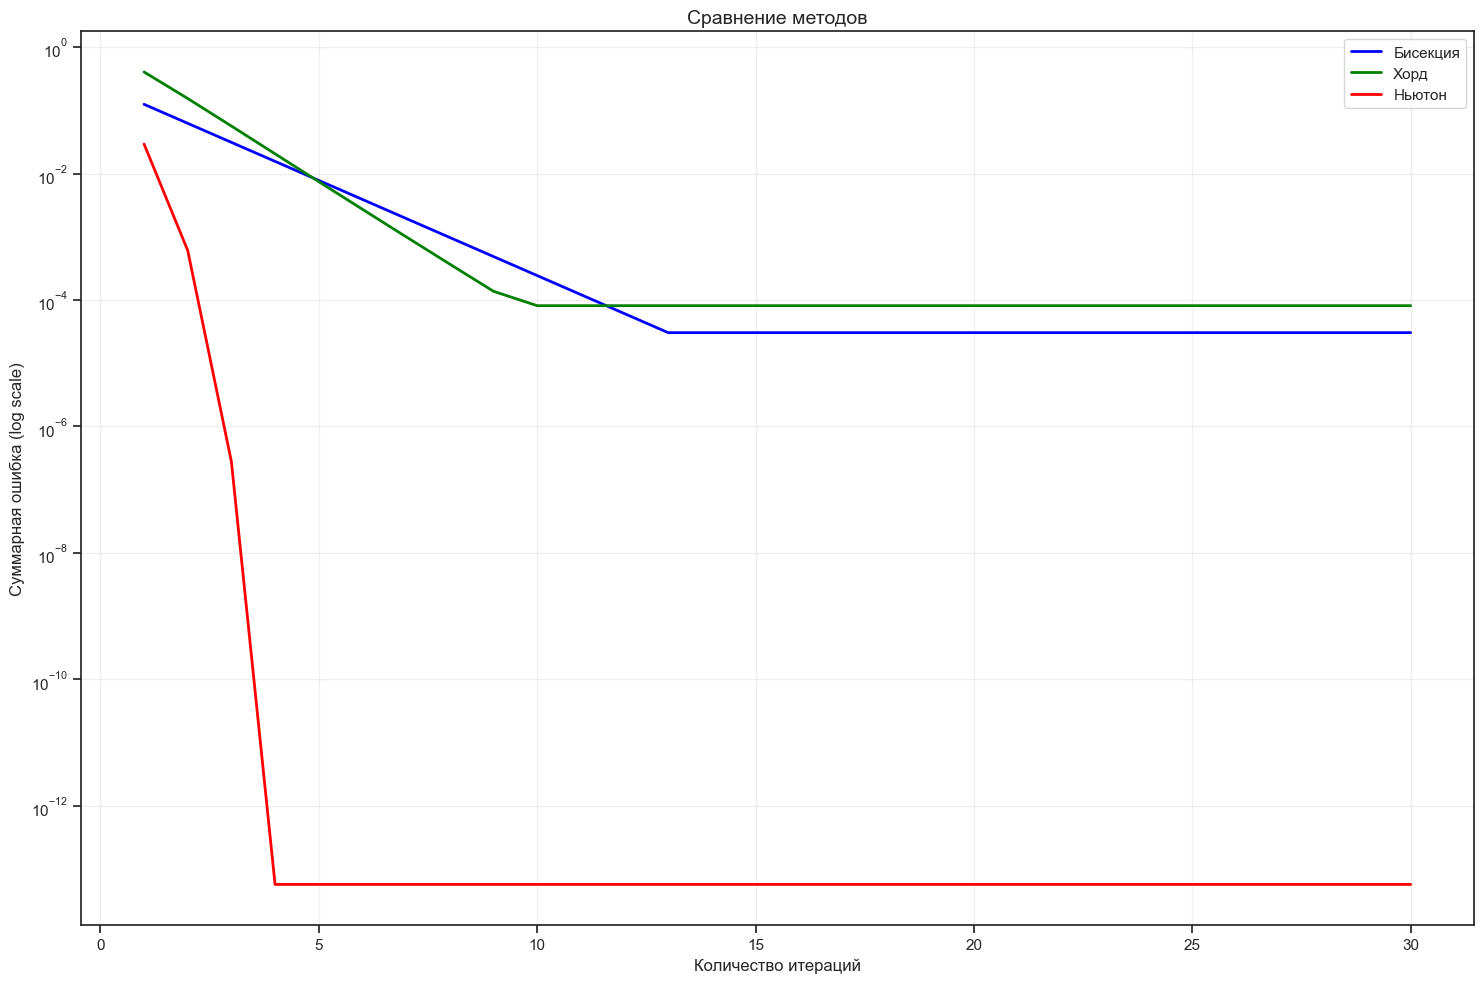

In [144]:
create_comparison_graphic(methods, f, intervals=[(-0.5, 0.5), (0.5, 2), (4, 6)],exact_roots=[0, 1, 5], max_iterations=30)
create_comparison_graphic(methods, f, intervals=[(-0.5, 0.5), (0.5, 2), (4, 6)],exact_roots=[0, 1, 5], max_iterations=30, log_scale=True)

#### Как мы видим, лучше всего работает метод Ньютона, а метод биссекции и метод хорд работают примерно одинаково. Первый график построен в линейной шкале, второй — в логарифмической, чтобы лучше видеть разницу. Попробуем все же проанилизоровать, кто из них ведет себя лучше. Для этого рассмотрим интервалы по отдельности.
Проверим методы на интервале 1 корня(здесь я беру интервал (-0.5, 0.4), так как на интервале (-0.5, 0.5) график ведет себя не совсем адекватно, видимо это связано с тем, что мешает корень x = 1):

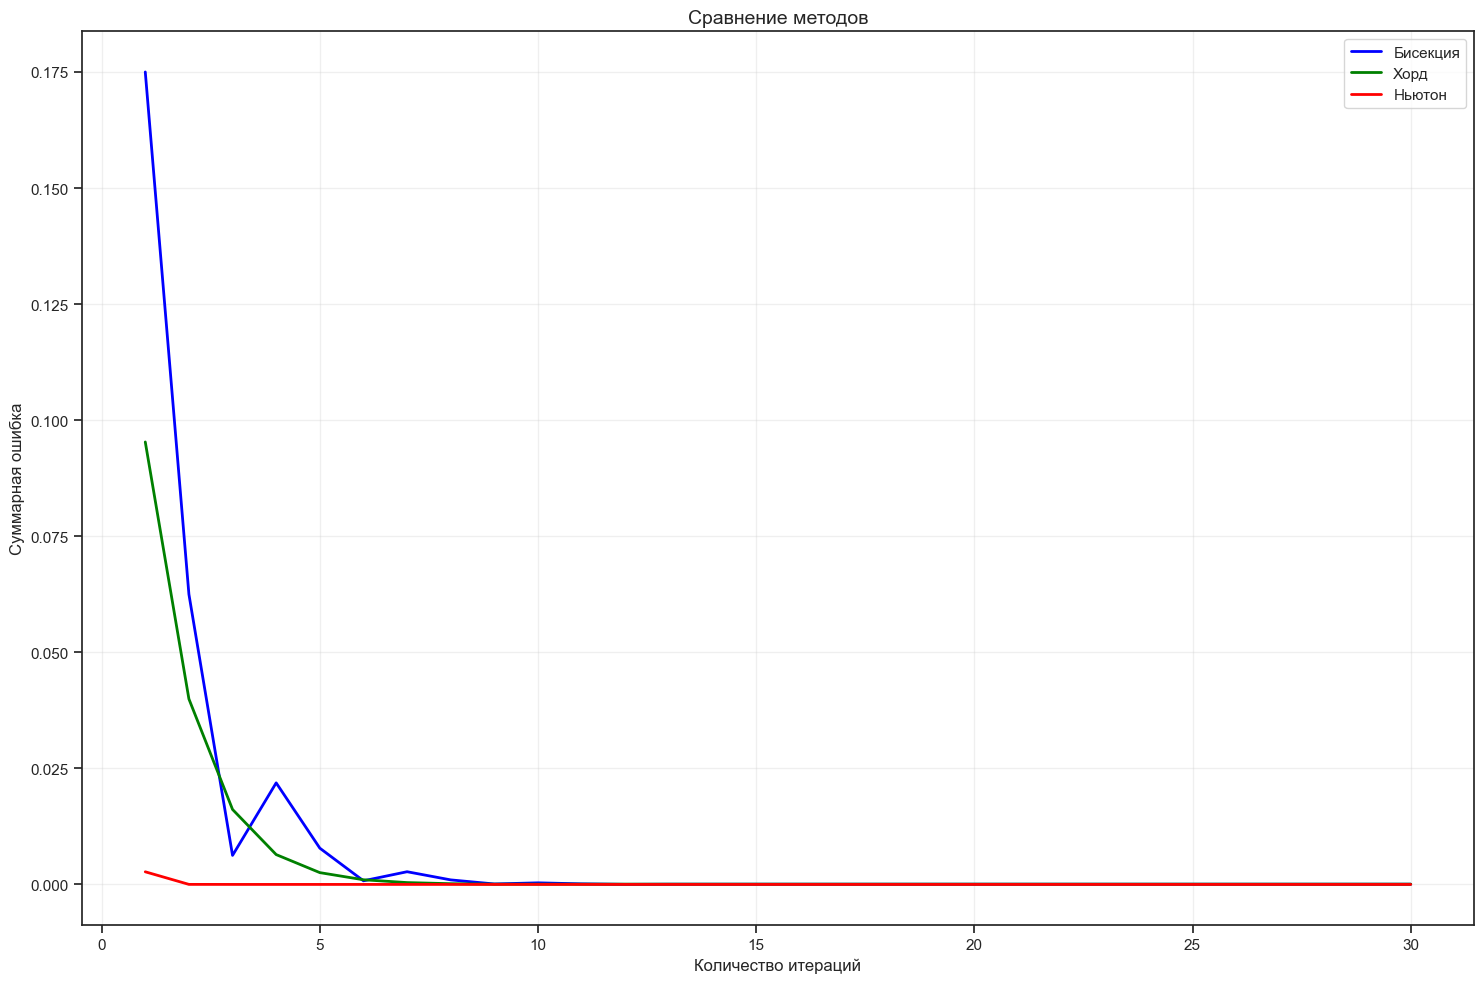

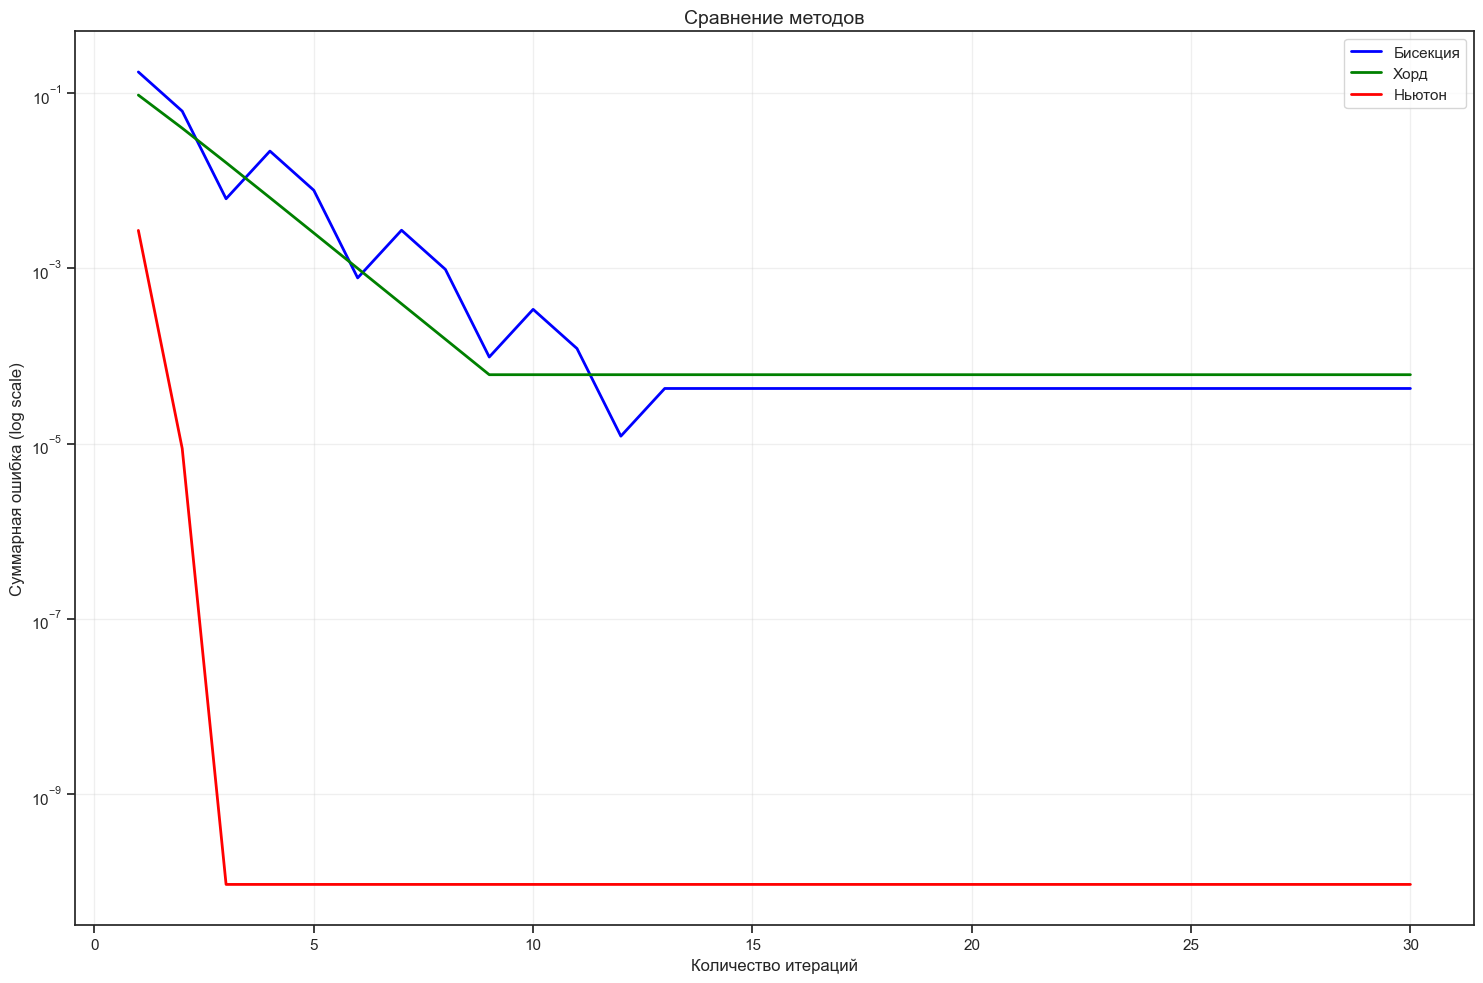

In [147]:
create_comparison_graphic(methods, f, intervals=[(-0.5, 0.4)],exact_roots=[0], max_iterations=30)
create_comparison_graphic(methods, f, intervals=[(-0.5, 0.4)],exact_roots=[0], max_iterations=30, log_scale=True)

И снова выигрывает метод Ньютона, метод хорд ведет себя стабильнее при увеличении кол-ва итераций, но все же по итоговой точности он проигрывает методу биссекций. 
Возьмем 2 интервал (0.5, 2):

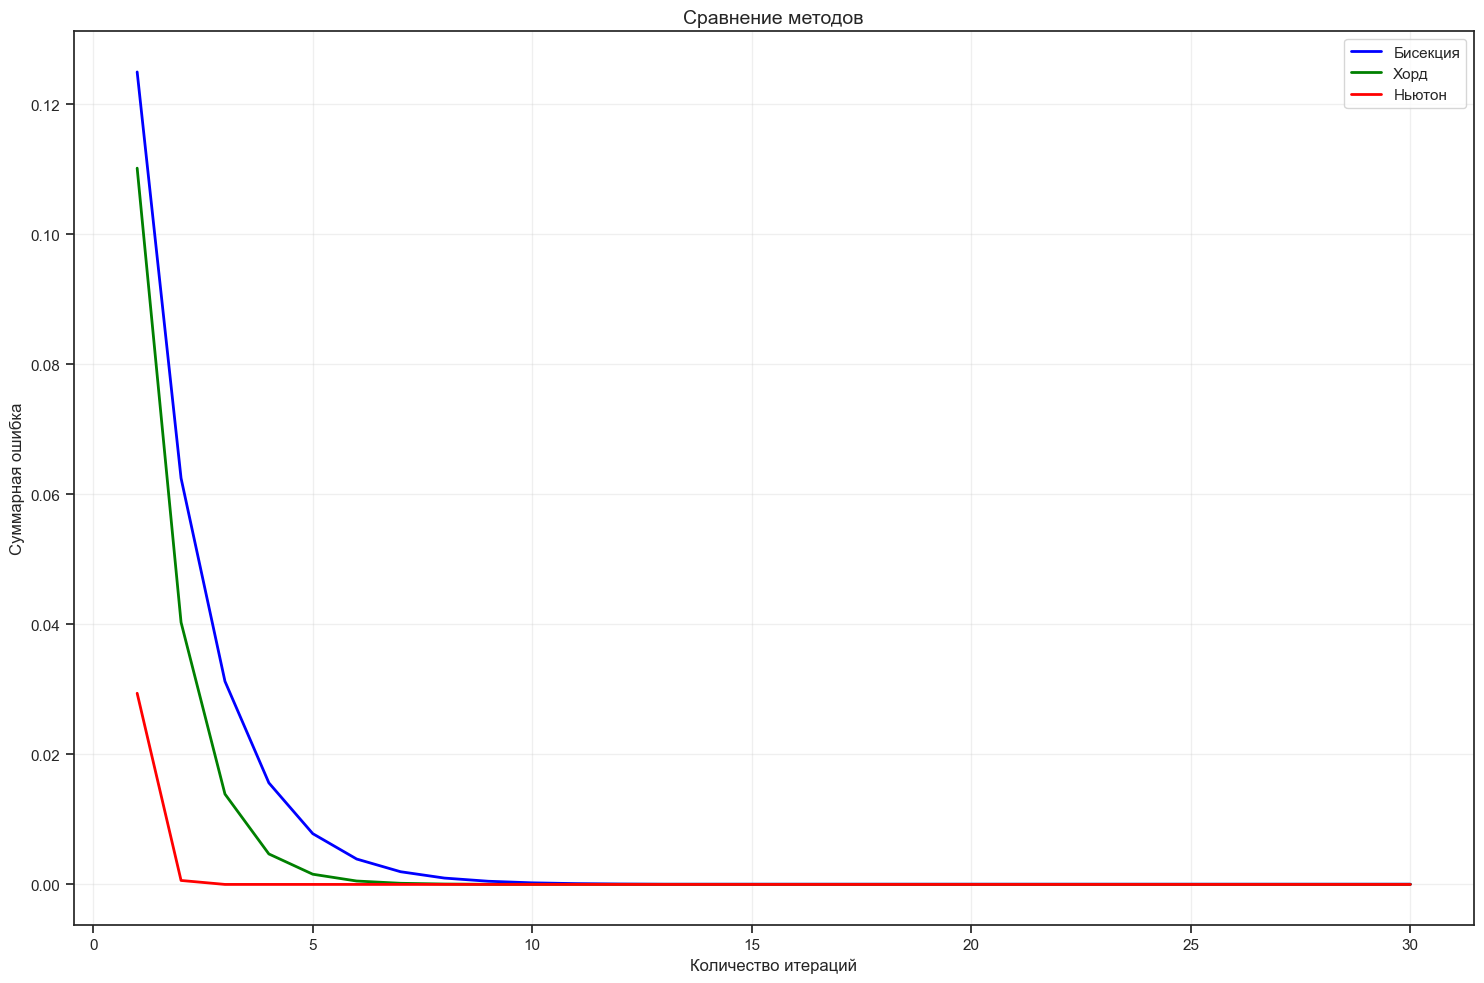

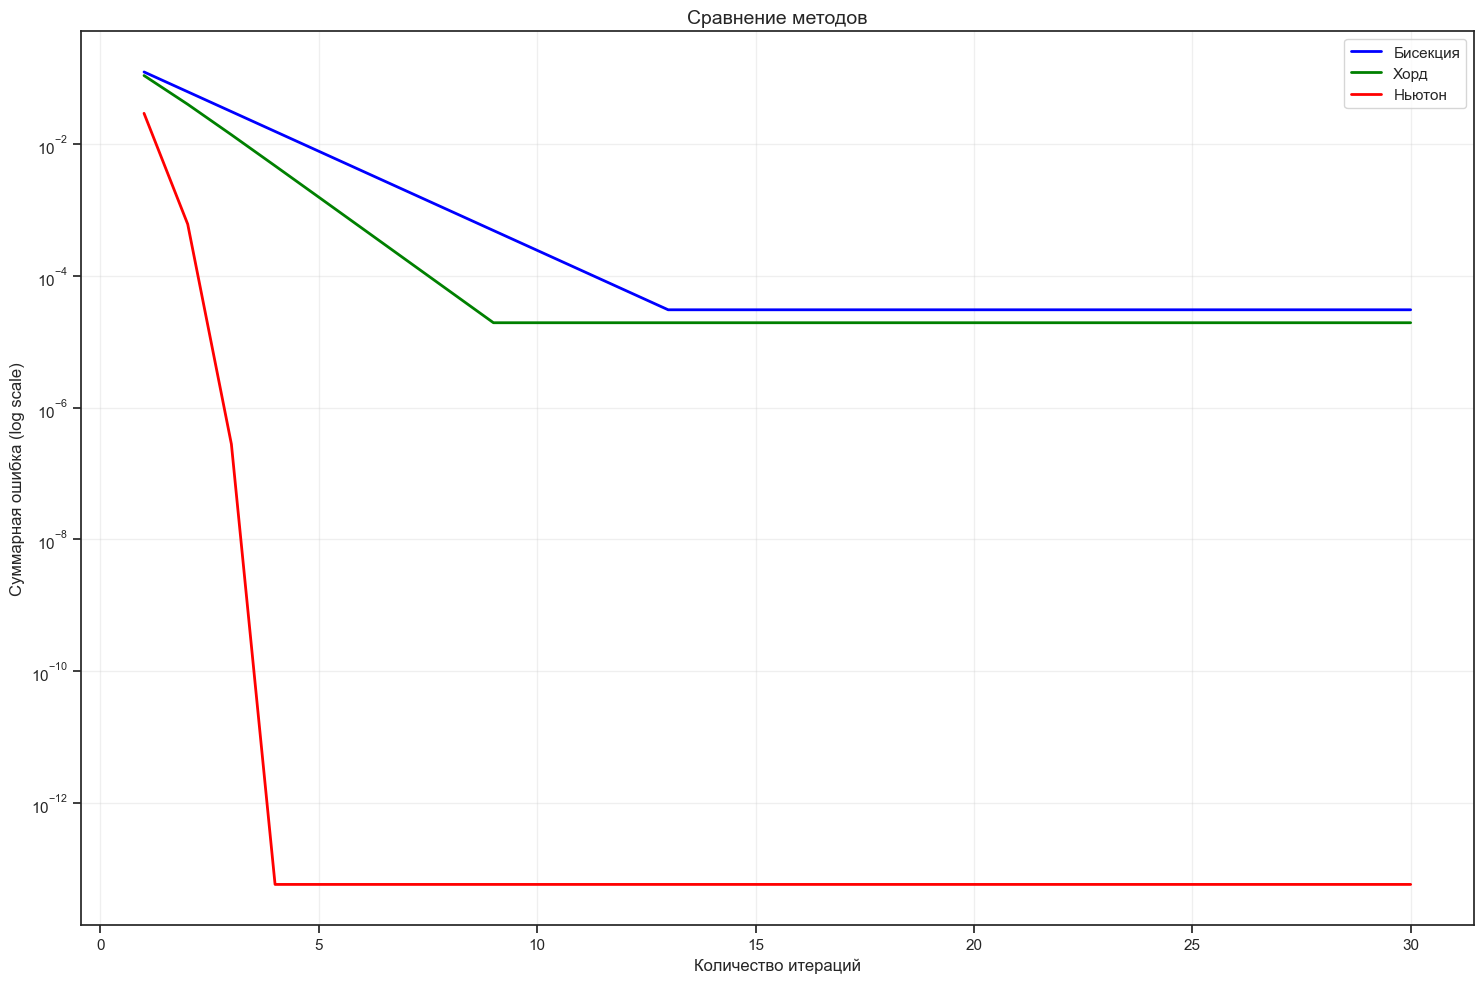

In [148]:
create_comparison_graphic(methods, f, intervals=[(0.5, 2)],exact_roots=[1], max_iterations=30)
create_comparison_graphic(methods, f, intervals=[(0.5, 2)],exact_roots=[1], max_iterations=30, log_scale=True)

Метод Ньютона работает лучше всего, а вот метод хорд при меньшем кол-ве итерации приходит к меньшей ошибке, чем метод биссекций. 
Возьмем 3 интервал (4, 7):

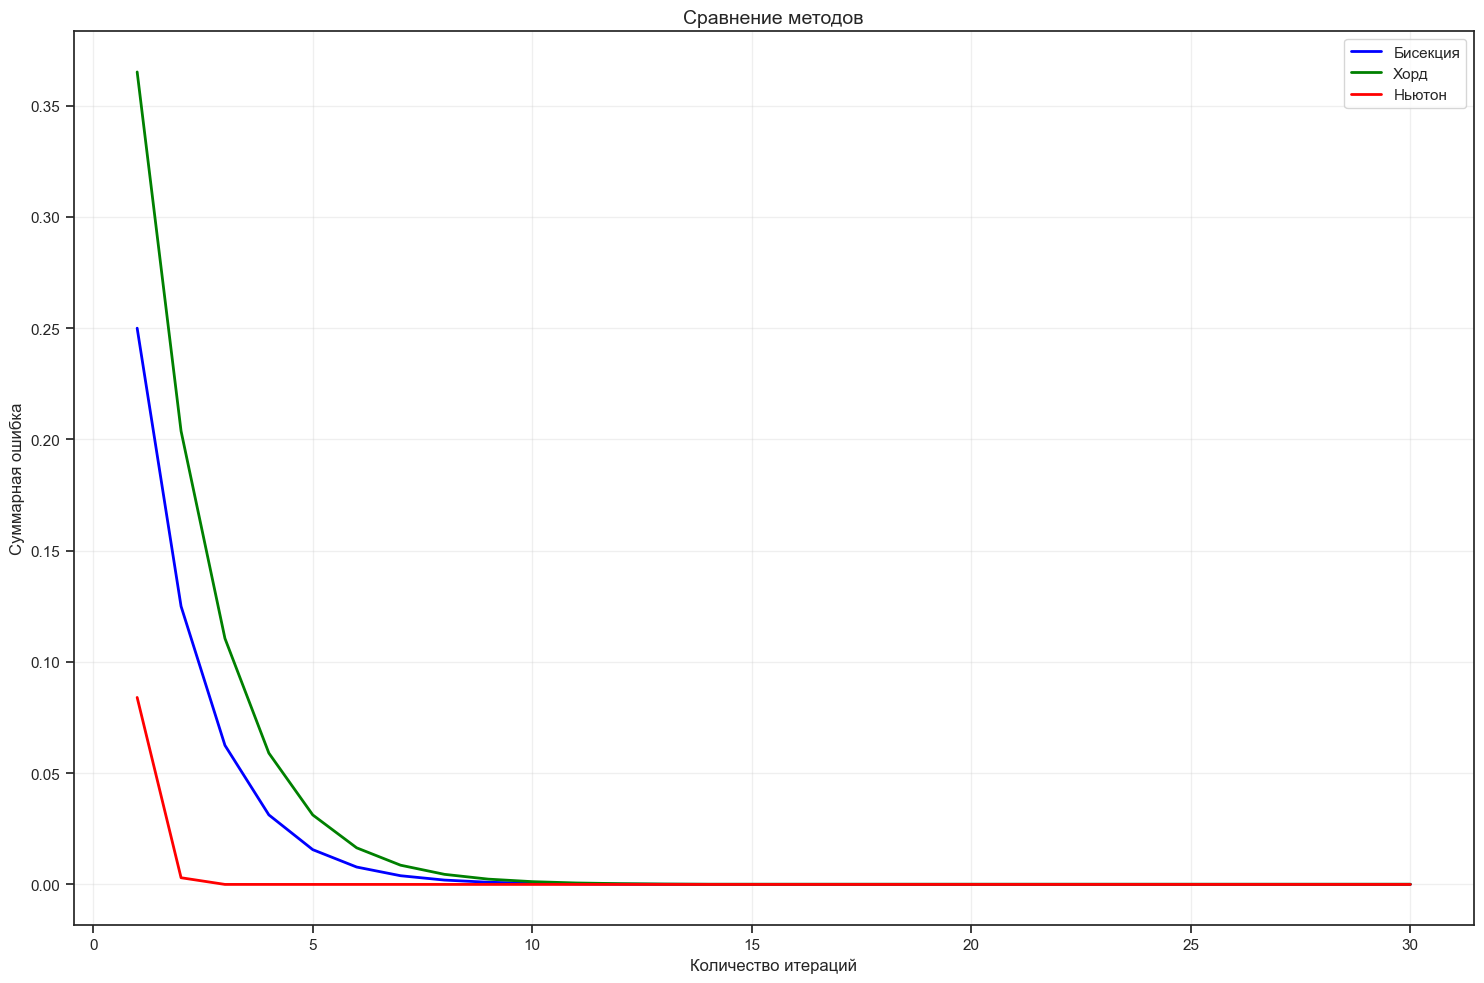

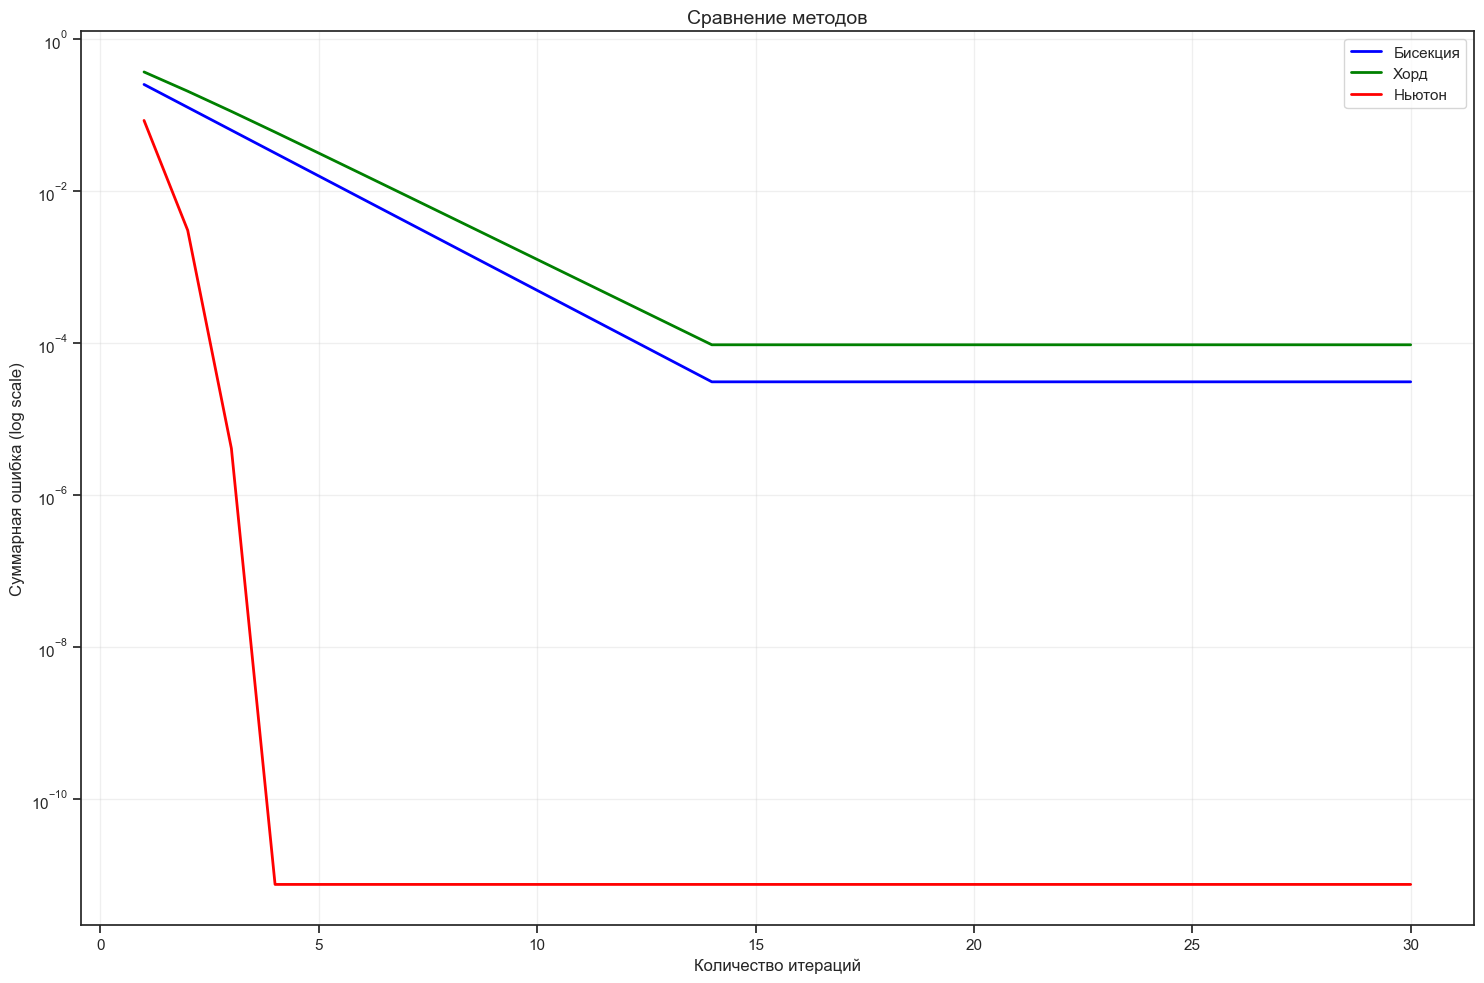

In [150]:
create_comparison_graphic(methods, f, intervals=[(4, 7)],exact_roots=[5], max_iterations=30)
create_comparison_graphic(methods, f, intervals=[(4, 7)],exact_roots=[5], max_iterations=30, log_scale=True)

### Как мы видим из представленных графиков, метод Ньютона работает лучше всего. Метод биссекции и метод хорд работают примерно одинаково, но с большей ошибкой и менее стабильно, чем метод Ньютона.
#### Стоит отметить и тот факт, что в ходе построения графиков метод Ньютона работал на любом взятом интервале, содержащем один корень, а вот метод хорд и метод биссекций не всегда